In [8]:
import pandas as pd

# URL for the Boston housing dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

# Load the dataset into a DataFrame
boston_df = pd.read_csv(boston_url)

# Display the first few rows of the DataFrame
display(boston_df.head())


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Boxplot for the "Median value of owner-occupied homes":

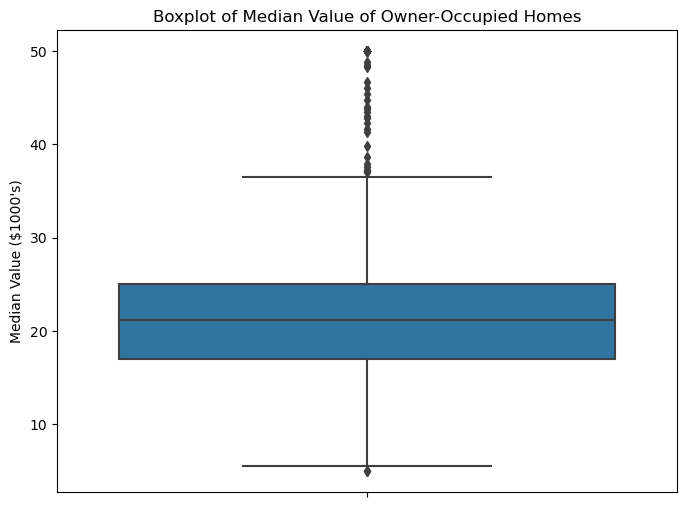

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=boston_df, y='MEDV')
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000\'s)')
plt.show()


# Bar plot for the Charles river variable:

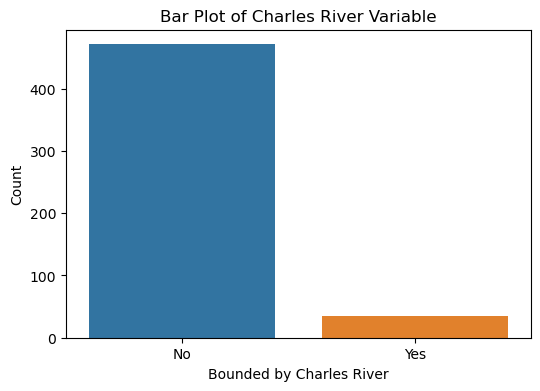

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=boston_df, x='CHAS')
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Bounded by Charles River')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


# Boxplot for the MEDV variable vs the AGE variable:

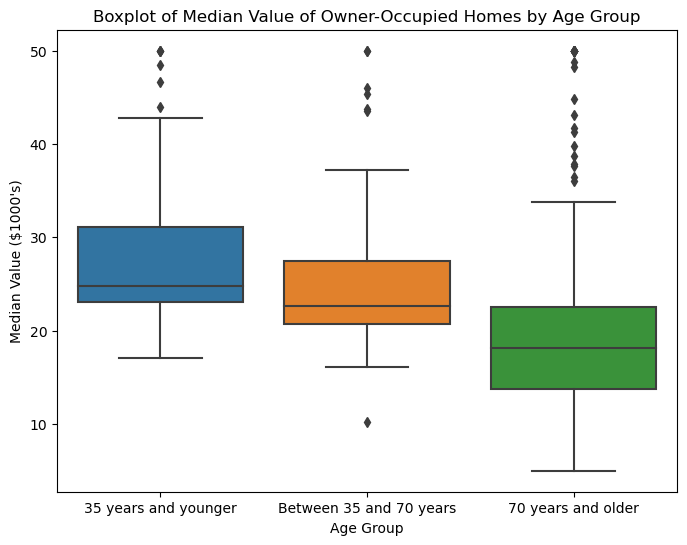

In [15]:
# Discretize the AGE variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(8, 6))
sns.boxplot(data=boston_df, x='AGE_Group', y='MEDV')
plt.title('Boxplot of Median Value of Owner-Occupied Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000\'s)')
plt.show()


# Scatter plot for the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town:

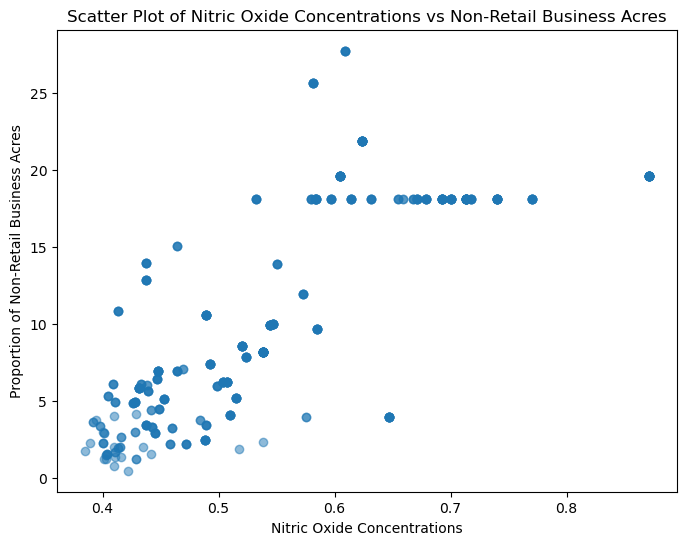

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(boston_df['NOX'], boston_df['INDUS'], alpha=0.5)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Non-Retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.show()


# Histogram for the pupil to teacher ratio variable

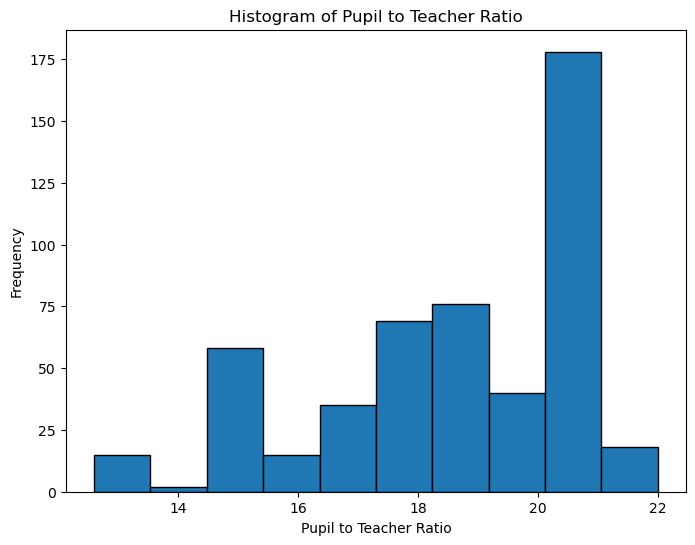

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=10, edgecolor='black')
plt.title('Histogram of Pupil to Teacher Ratio')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [9]:
from scipy import stats

# Separate data for houses bounded and not bounded by the Charles river
bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(bounded, not_bounded)

# Compare p-value to significance level (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in median values of houses bounded by the Charles river and those not bounded by it.")
else:
    print("There is no significant difference in median values of houses bounded by the Charles river and those not bounded by it.")


There is a significant difference in median values of houses bounded by the Charles river and those not bounded by it.


# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [10]:
# Discretize the AGE variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Perform ANOVA
anova_result = stats.f_oneway(
    boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV'],
    boston_df[boston_df['AGE_Group'] == 'Between 35 and 70 years']['MEDV'],
    boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']
)

# Compare p-value to significance level (α = 0.05)
if anova_result.pvalue < alpha:
    print("There is a difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")
else:
    print("There is no difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")


There is a difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [11]:
# Perform Pearson correlation
correlation_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Compare p-value to significance level (α = 0.05)
if p_value > alpha:
    print("We fail to conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("We conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")


We conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [12]:
import statsmodels.api as sm

# Add constant term for intercept
X = sm.add_constant(boston_df['DIS'])

# Fit ordinary least squares (OLS) regression model
model = sm.OLS(boston_df['MEDV'], X)
results = model.fit()

# Print summary of regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 03 May 2024   Prob (F-statistic):           1.21e-08
Time:                        00:51:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# Conclusions:

There is a significant difference in median values of houses bounded by the Charles river and those not bounded by it.

Houses bounded by the river tend to have higher median values.

There is no difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

The weighted distance to the five Boston employment centres has a statistically significant impact on the median value of owner-occupied homes, with an increase in distance associated with a decrease in median value.

# Findings Summary:
The median value of houses bounded by the Charles river is higher compared to those not bounded by it, indicating a potential premium for properties with riverfront views.
Median house values do not vary significantly based on the proportion of owner-occupied units built prior to 1940, suggesting that the age of properties in a neighborhood may not strongly influence property values.
There is no discernible relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town, indicating that these factors may not directly impact property values.
The distance to employment centres has a significant impact on property values, with homes closer to employment centres commanding higher prices.

# Recommendations:
Focus on marketing properties with riverfront views as premium options, emphasizing the lifestyle benefits associated with living by the river.

Consider investing in neighborhoods with older properties, as they may offer good value for buyers without significant differences in median house prices.

While Nitric oxide concentrations and non-retail business acres may not directly influence property values, consider other factors such as amenities, schools, and transportation options when assessing property investment opportunities.

Develop strategies to highlight the proximity of properties to employment centres as a selling point, particularly for buyers who prioritize convenience and accessibility.